In [1]:
import tweepy       # python wrapper for twitter api
import json
import time
import requests
# step 0, get your own twitter credentials!

In [2]:
# this is my own personal twitter api information
# if you could be so kind as to sign up yourself on both twitter and mashape that'd be great :)
# It's FREEEEEEE
api_key = 'g5uPIpw80nULQI1gfklv2zrh4'
api_secret = 'cOWvNWxYvPmEZ0ArZVeeVVvJu41QYHdUS2GpqIKtSQ1isd5PJy'
access_token = '49722956-TWl8J0aAS6KTdcbz3ppZ7NfqZEmrwmbsb9cYPNELG'
access_secret = '3eqrVssF3ppv23qyflyAto8wLEiYRA8sXEPSghuOJWTub'

In [3]:
# Documentation is your friend! http://docs.tweepy.org/en/v3.1.0/
auth = tweepy.OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth) # returns a tweepy authorization handler object

In [80]:
# 1. Use Twitter API to stream and store tweets (300 per candidate)
# 37.781157,-122.39872 is the lat,lng for SF
music_tweets = api.search(q='#music', count=100, geocode="37.781157,-122.398720,10mi")+\
api.search(q='#concert', count=100, geocode="37.781157,-122.398720,10mi")+\
api.search(q='#band', count=100, geocode="37.781157,-122.398720,10mi")

In [81]:
len(music_tweets)

172

In [82]:
music_tweets[0].text

u'Posted a new song: "under the sea (little mermaid)" https://t.co/Uww7uRB6zs #music https://t.co/0yEqtoGEn6'

In [83]:
# wrappers come with built in python attributes and methods!
print dir(music_tweets[0])

['__class__', '__delattr__', '__dict__', '__doc__', '__eq__', '__format__', '__getattribute__', '__getstate__', '__hash__', '__init__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'metadata', 'parse', 'parse_list', 'place', 'possibly_sensitive', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [84]:
print music_tweets[0].created_at
print music_tweets[0].text
print music_tweets[0].favorite_count
print music_tweets[0].favorited
print music_tweets[0].lang
print music_tweets[0].geo
print music_tweets[0].retweet_count
print music_tweets[0].retweeted
print music_tweets[0].coordinates

2016-12-01 02:04:14
Posted a new song: "under the sea (little mermaid)" https://t.co/Uww7uRB6zs #music https://t.co/0yEqtoGEn6
0
False
en
None
0
False
None


In [85]:
# modify the tweets to make a nice dictionary
def parse_status_objects(tweet_list):
    modified_tweets = list()
    for x in tweet_list:
        modified_tweets.append( [
                    x.created_at,
                    x.text,
                    x.favorite_count,
                    x.favorited,
                    x.lang,
                    x.geo,
                    x.retweet_count,
                    x.retweeted,
                    x.coordinates
                ])
    return modified_tweets
        
music_tweets = parse_status_objects(music_tweets)

In [86]:
print music_tweets[0]

[datetime.datetime(2016, 12, 1, 2, 4, 14), u'Posted a new song: "under the sea (little mermaid)" https://t.co/Uww7uRB6zs #music https://t.co/0yEqtoGEn6', 0, False, u'en', None, 0, False, None]


In [87]:
type(music_tweets)

list

In [88]:
import pandas as pd
import numpy as np
# 2 Create a dataframe that combines all of the tweets from each candidate
# To do so, you will need to concat the data frames
# so each row is a tweet and your columns should be 
# date, text, favorite_count,favorited, language, geocode, retweet count, retweeted, coordinates
cols = ['date', 'text', 'favorite_count', 'favorited', 'language', 'geocode', 'retweet count', 'retweeted', 'coordinates']
music_df = pd.DataFrame(music_tweets, columns=cols)
music_df.head()

,date,text,favorite_count,favorited,language,geocode,retweet count,retweeted,coordinates
0,2016-12-01 02:04:14,"Posted a new song: ""under the sea (little merm...",0,False,en,None,0,False,None
1,2016-12-01 02:01:11,Stronger Than Dirt by Big Mama Thornton https:...,0,False,en,None,0,False,None
2,2016-12-01 02:01:10,Purple Rain by Prince https://t.co/yhw61ETe7R ...,0,False,en,None,0,False,None
3,2016-12-01 02:01:10,Nina Simone &amp; Piano by Nina Simone https:/...,1,False,it,None,0,False,None
4,2016-12-01 02:00:23,#KanyeWest Out of Hospital: Report #musicnews ...,0,False,en,None,0,False,None


In [89]:
from textblob import TextBlob, Word

# 3 Create a function to take in a string and output the textblob sentiment of that string
def create_sentiment(str):
    tb = TextBlob(str)
    return tb.sentiment.polarity

In [90]:
# 4 Add a column to your data frame called 'sentiment'
# which holds the sentiment of that tweet (hint: use the function from #3)
music_df['sentiment'] = music_df['text'].apply(lambda x: create_sentiment(x))
music_df.head()

,date,text,favorite_count,favorited,language,geocode,retweet count,retweeted,coordinates,sentiment
0,2016-12-01 02:04:14,"Posted a new song: ""under the sea (little merm...",0,False,en,None,0,False,None,-0.025568
1,2016-12-01 02:01:11,Stronger Than Dirt by Big Mama Thornton https:...,0,False,en,None,0,False,None,0.000000
2,2016-12-01 02:01:10,Purple Rain by Prince https://t.co/yhw61ETe7R ...,0,False,en,None,0,False,None,0.000000
3,2016-12-01 02:01:10,Nina Simone &amp; Piano by Nina Simone https:/...,1,False,it,None,0,False,None,0.000000
4,2016-12-01 02:00:23,#KanyeWest Out of Hospital: Report #musicnews ...,0,False,en,None,0,False,None,0.000000


In [91]:
# 5 create a word count column, which holds the number of words in the text column
music_df['word_count'] = music_df['text'].apply(lambda x: len(x))
music_df.head()

,date,text,favorite_count,favorited,language,geocode,retweet count,retweeted,coordinates,sentiment,word_count
0,2016-12-01 02:04:14,"Posted a new song: ""under the sea (little merm...",0,False,en,None,0,False,None,-0.025568,106
1,2016-12-01 02:01:11,Stronger Than Dirt by Big Mama Thornton https:...,0,False,en,None,0,False,None,0.000000,112
2,2016-12-01 02:01:10,Purple Rain by Prince https://t.co/yhw61ETe7R ...,0,False,en,None,0,False,None,0.000000,104
3,2016-12-01 02:01:10,Nina Simone &amp; Piano by Nina Simone https:/...,1,False,it,None,0,False,None,0.000000,111
4,2016-12-01 02:00:23,#KanyeWest Out of Hospital: Report #musicnews ...,0,False,en,None,0,False,None,0.000000,115


In [92]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# use countvectorizer to create a document-term matrix and concatinate it to your main dataframe
#(hint you should now have thousands of columns)
# Don't add count vectorizer result to the original dataframe
vect = TfidfVectorizer()
tfidf_df = pd.DataFrame(vect.fit_transform(music_df['text']).toarray(), columns=vect.get_feature_names())
tfidf_df.head()

,00,01,02,03,05,05ira8jwmk,06,07,08,09,...,z0kxwxk7l4,zappa,zd4ymmecem,zemfira,ziggy,zj1pjepajh,zjvu2rpvch,znslqigq4m,zoldep52nr,zrbozhmgry
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [93]:
combined_df = pd.concat([music_df,tfidf_df])
combined_df.head()

,00,01,02,03,05,05ira8jwmk,06,07,08,09,...,z0kxwxk7l4,zappa,zd4ymmecem,zemfira,ziggy,zj1pjepajh,zjvu2rpvch,znslqigq4m,zoldep52nr,zrbozhmgry
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
vect = CountVectorizer()
count_df = pd.DataFrame(vect.fit_transform(music_df['text']).toarray(), columns=vect.get_feature_names())
count_df.head()

,00,01,02,03,05,05ira8jwmk,06,07,08,09,...,z0kxwxk7l4,zappa,zd4ymmecem,zemfira,ziggy,zj1pjepajh,zjvu2rpvch,znslqigq4m,zoldep52nr,zrbozhmgry
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
from sklearn.cluster import KMeans

# 6 Use kmean to create clusters for the dataframe of words only (choose an optimal k)
# Don't add clusters to the original dataframe yet
km = KMeans(n_clusters=3, random_state=1)
km.fit(tfidf_df)

from sklearn import metrics
metrics.silhouette_score(tfidf_df, km.labels_)

0.045956118706212579

In [96]:
k_range = range(2, 165)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(tfidf_df)
    scores.append(metrics.silhouette_score(tfidf_df, km.labels_))

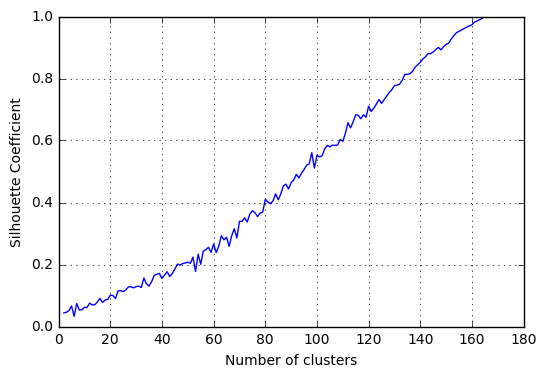

In [97]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

In [98]:
k_range = range(2, 20)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(tfidf_df)
    scores.append(metrics.silhouette_score(tfidf_df, km.labels_))

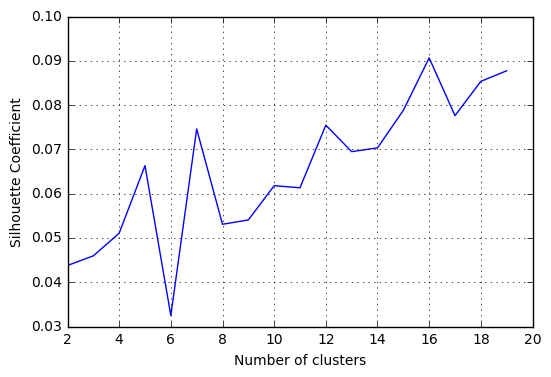

In [99]:
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

In [100]:
km = KMeans(n_clusters=4, random_state=1)
km.fit(tfidf_df)
print metrics.silhouette_score(tfidf_df, km.labels_)
km.labels_

0.0510703872921


array([3, 3, 3, 3, 0, 3, 2, 2, 3, 2, 2, 3, 3, 3, 0, 0, 3, 0, 0, 0, 0, 3, 3,
       0, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 3, 3, 0, 2, 3, 0, 0, 0, 2, 2,
       0, 0, 0, 0, 0, 3, 0, 2, 2, 0, 0, 3, 3, 3, 2, 3, 0, 2, 2, 2, 2, 3, 3,
       3, 3, 0, 3, 0, 3, 0, 0, 0, 3, 2, 0, 2, 3, 3, 3, 0, 0, 2, 3, 0, 0, 0,
       0, 2, 2, 3, 3, 3, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 3, 1, 1, 0, 3,
       0, 3, 0, 3, 3, 0, 0, 3, 3, 3, 0], dtype=int32)

In [101]:
k_range = range(2, 100)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(count_df)
    scores.append(metrics.silhouette_score(count_df, km.labels_))

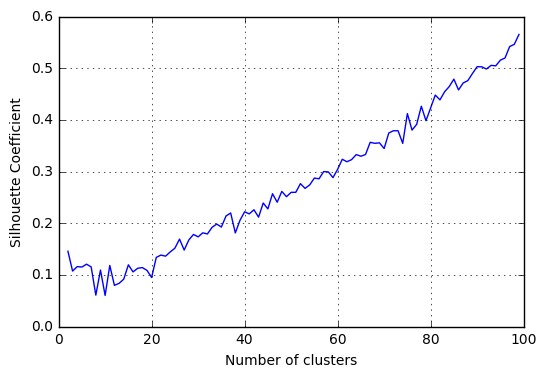

In [102]:
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

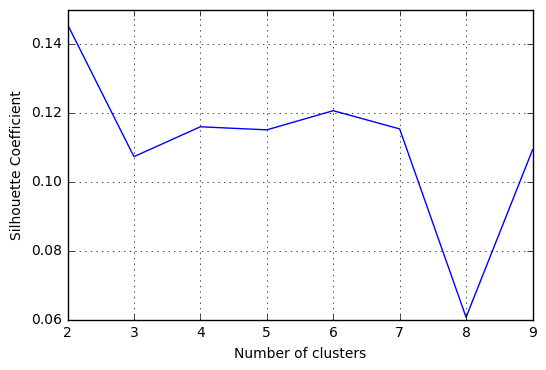

In [103]:
k_range = range(2, 10)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(count_df)
    scores.append(metrics.silhouette_score(count_df, km.labels_))
    
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

In [104]:
km = KMeans(n_clusters=6, random_state=1)
km.fit(tfidf_df)
print metrics.silhouette_score(tfidf_df, km.labels_)
km.labels_

0.0324753124848


array([1, 0, 0, 0, 1, 0, 4, 4, 5, 4, 4, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 4, 5, 4, 4, 4, 1, 4, 4, 4, 0, 0, 0, 5, 4, 0, 1, 1, 1, 4, 4,
       1, 1, 1, 1, 5, 1, 1, 4, 4, 1, 1, 0, 0, 0, 4, 1, 1, 4, 4, 4, 4, 0, 0,
       0, 0, 1, 1, 5, 1, 1, 1, 1, 1, 4, 1, 4, 0, 0, 0, 5, 5, 4, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 2, 3, 3, 3, 5, 3, 5, 1, 1, 3, 3, 3, 3, 2, 3,
       3, 1, 2, 3, 5, 5, 3, 5, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       2, 5, 2, 2, 5, 2, 2, 2, 3, 3, 1, 5, 3, 3, 3, 5, 5, 3, 1, 3, 3, 5, 1,
       1, 1, 1, 5, 5, 0, 1, 0, 1, 0, 0], dtype=int32)

In [79]:
music_df['cluster'] = km.labels_
music_df.head()

,date,text,favorite_count,favorited,language,geocode,retweet count,retweeted,coordinates,sentiment,word_count,cluster
0,2016-12-01 01:01:24,Legacy Volume 3: Early Recordings by Leadbelly...,0,False,en,None,0,False,None,0.1,114,1
1,2016-12-01 01:01:24,The #Soul Album by Otis Redding https://t.co/b...,0,False,en,None,0,False,None,0.0,104,1
2,2016-12-01 01:01:21,All the Best by Paul McCartney https://t.co/YF...,0,False,en,None,0,False,None,1.0,99,1
3,2016-12-01 01:00:26,Friday @oasisartdesign presents #COLLAB inside...,0,False,en,None,0,False,None,0.0,116,5
4,2016-12-01 00:52:53,RT @SugoMusicGroup: Trump Isn't Going to Make ...,0,False,en,None,1,False,None,0.8,100,5


In [ ]:
# 7 Explore the clusters
# What is interesting? Surprising? Can you draw any inferences about each cluster?
# Was this enough to find any relevant topics about music tweets?
# Can you give any of the clusters name?

In [ ]:
# 8. use LSA to obtain better topic clusters. Can you give any of the clusters name?
# Make a boxplot of sentiment for each candidate by the "democrat" column

In [ ]:
# 9. Think of 3 more hashtags you wish to explore (all of them should be about the same thing)
# and make a dataframe the same way we did in the previous steps
other_tweets = api.search(q='#music', count=100, geocode="37.781157,-122.398720,10mi")+\
api.search(q='#concert', count=100, geocode="37.781157,-122.398720,10mi")+\
api.search(q='#band', count=100, geocode="37.781157,-122.398720,10mi")

other_tweets = parse_status_objects(other_tweets)

In [ ]:
# 10. Use whatever clustering method (DBSCAN, LSA, KMEANS) you deem best (silhouette coeff?) and make a supervised model out of it
# IE try to predict the clusters you obtained by using the features
# Note clustering does not HAVE to include text if you do not want it to in that case LSA won't help

In [ ]:
# 11. cross validate and create the best possible supervised model for your new clusters on your new daa
# You may use the music data if you wish